#  PREDICT SALE OF M1 MACBOOK

<img src="M1.jpeg" style = "width:500px;height:450px" align = "right"/>

##### 1. PROJECT OBJECTIVES:

- The primary objective of the project is to determine the profile of the clients that would be the most likely to buy the Apple's newly released M1 Macbook.

##### 2. DATA COLLECTION:

- The data was collected through a survey sent across different techno savvy groups over 1 week period of time.

##### 3. DATA PREPARATION & ANALYSIS :

- Collected data is prepared by converting columns with appropriate labels.
- Collected data is prepared by encoding Boolean value and converting dtypes.
- Datasets are linearly separable using all 22 input features.

##### 4. CORRELATION & FEATURE SELECTION :

- The dataset consists of multiple suitable features to predit the profile of the clients who would purchse the new Apple's M1 Macbook.

- With the help of correlation matrix a strong relationship will be drawn between multiple feature which are then labelled and categorized as independent variable (x) used along with a target variable 'm1_purchase' (y) to fit a model that can predict the profiles of the clients who would likely purchse the new Apple's M1 Macbook. 

##### 5. MODEL CHOISE:

- A Support Vector Machine (SVM) will be used in this notebook as SVM is a very powerful and versatile Machine Learning model, capable of performing linear or nonliner classification, regression, and even outlier detection from the scikit-learn package.

In [1]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
#from scipy.stats import norm
import seaborn as sns
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid',
rc= {'figure.facecolor': 'gray',}, font_scale=1.5)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [2]:
# LOADING THE DATASET
df = pd.DataFrame
df = pd.read_csv('M1_data.csv',delimiter=",")

In [3]:
df

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status,domain
0,No,4,8,PC,0,No,5,4,3,4,...,2,1,1,1,Yes,Male,2,2,Student,Science
1,Yes,2,4,PC,1,No,5,5,5,3,...,2,2,4,2,No,Male,2,3,Employed,Finance
2,Yes,5,6,PC,0,No,3,4,2,4,...,2,2,2,4,Yes,Male,2,2,Student,IT & Technology
3,Yes,2,6,Apple,4,No,4,3,3,4,...,4,4,3,2,No,Female,2,2,Student,Arts & Culture
4,Yes,4,4,Apple,7,Yes,5,3,3,4,...,3,4,4,4,Yes,Male,5,7,Employed,Hospitality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Yes,5,0,PC,1,Yes,5,3,3,5,...,5,3,3,5,Yes,Male,3,3,Student,Engineering
129,Yes,5,8,Apple,5,Yes,4,3,2,4,...,2,3,1,5,Yes,Male,3,5,Employed,Administration & Public Services
130,Yes,4,0,Apple,8,Yes,5,4,3,5,...,4,4,5,5,Yes,Female,2,3,Student,Marketing
131,Yes,5,5,Apple,4,Yes,5,3,4,4,...,2,3,3,5,Yes,Female,2,2,Student,IT & Technology


In [4]:
# RENAMING THE DATAFRAME
apple_df =df

In [5]:
# LOOKING FOR UNIQUE VALUE ON STATUS
apple_df['status'].unique()

array(['Student', 'Employed', 'Retired', 'Student ant employed',
       'Unemployed', 'Self-Employed'], dtype=object)

In [6]:
# LOOKING FOR UNIQUE VALUE ON TYPE OF USER
apple_df['user_pcmac'].unique()

array(['PC', 'Apple', 'Hp', 'Other'], dtype=object)

In [7]:
# LOOKING FOR UNIQUE DOMAIN OF USERS
apple_df['domain'].unique()

array(['Science', 'Finance', 'IT & Technology', 'Arts & Culture',
       'Hospitality', 'Politics', 'Social Sciences',
       'Administration & Public Services', 'Education', 'Engineering',
       'Marketing', 'Healthcare', 'Business', 'Retired', 'Economics',
       'Law', 'Agriculture', 'Communication ', 'Realestate', 'Logistics',
       'Consulting ', 'Retail'], dtype=object)

In [8]:
# CHECKING FOR NULL VALUES
apple_df.isnull().sum()

trust_apple            0
interest_computers     0
age_computer           0
user_pcmac             0
appleproducts_count    0
familiarity_m1         0
f_batterylife          0
f_price                0
f_size                 0
f_multitasking         0
f_noise                0
f_performance          0
f_neural               0
f_synergy              0
f_performanceloss      0
m1_consideration       0
m1_purchase            0
gender                 0
age_group              0
income_group           0
status                 0
domain                 0
dtype: int64

In [9]:
# LABEL ENCODING

apple_df['trust_apple'] = apple_df['trust_apple'].replace(['Yes','No'],['1','0'])
apple_df['user_pcmac'] = apple_df['user_pcmac'].replace(['PC','Apple','Hp','Other'],['1','0','2','2'])
apple_df['familiarity_m1'] = apple_df['familiarity_m1'].replace(['Yes','No'],['1','0'])
apple_df['m1_purchase'] = apple_df['m1_purchase'].replace(['Yes','No'],['1','0'])
apple_df['gender'] = apple_df['gender'].replace(['Male','Female'],['1','0'])
apple_df['status'] = apple_df['status'].replace(['Male','Female'],['1','0'])
apple_df['gender'] = apple_df['gender'].replace(['Male','Female'],['1','0'])
apple_df['status'] = apple_df['status'].replace(['Student','Employed','Retired','Student ant employed','Unemployed','Self-Employed'],['0','1','2','1','3','4'])
apple_df['domain'] = apple_df['domain'].replace(['Science','Finance','IT & Technology','Arts & Culture','Hospitality','Politics','Social Sciences','Administration & Public Services','Education','Engineering','Marketing','Healthcare','Business','Retired','Economics','Law','Agriculture','Communication ','Realestate','Logistics','Consulting ','Retail'],['0','1','2','3','4','5','6','7','8','9','10','11','12','21','13','14','15','16','17','18','29','20'])

apple_df

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status,domain
0,0,4,8,1,0,0,5,4,3,4,...,2,1,1,1,1,1,2,2,0,0
1,1,2,4,1,1,0,5,5,5,3,...,2,2,4,2,0,1,2,3,1,1
2,1,5,6,1,0,0,3,4,2,4,...,2,2,2,4,1,1,2,2,0,2
3,1,2,6,0,4,0,4,3,3,4,...,4,4,3,2,0,0,2,2,0,3
4,1,4,4,0,7,1,5,3,3,4,...,3,4,4,4,1,1,5,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,5,0,1,1,1,5,3,3,5,...,5,3,3,5,1,1,3,3,0,9
129,1,5,8,0,5,1,4,3,2,4,...,2,3,1,5,1,1,3,5,1,7
130,1,4,0,0,8,1,5,4,3,5,...,4,4,5,5,1,0,2,3,0,10
131,1,5,5,0,4,1,5,3,4,4,...,2,3,3,5,1,0,2,2,0,2


In [10]:
# FIST LOOK AT THE DAT TYPES
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trust_apple          133 non-null    object
 1   interest_computers   133 non-null    int64 
 2   age_computer         133 non-null    int64 
 3   user_pcmac           133 non-null    object
 4   appleproducts_count  133 non-null    int64 
 5   familiarity_m1       133 non-null    object
 6   f_batterylife        133 non-null    int64 
 7   f_price              133 non-null    int64 
 8   f_size               133 non-null    int64 
 9   f_multitasking       133 non-null    int64 
 10  f_noise              133 non-null    int64 
 11  f_performance        133 non-null    int64 
 12  f_neural             133 non-null    int64 
 13  f_synergy            133 non-null    int64 
 14  f_performanceloss    133 non-null    int64 
 15  m1_consideration     133 non-null    int64 
 16  m1_purch

In [11]:
# COVERING DTYPES 

apple_df['trust_apple'] = pd.to_numeric(apple_df['trust_apple'])
apple_df['user_pcmac'] = pd.to_numeric(apple_df['user_pcmac'])
apple_df['familiarity_m1'] = pd.to_numeric(apple_df['familiarity_m1'])
apple_df['m1_purchase'] = pd.to_numeric(apple_df['m1_purchase'])
apple_df['gender'] = pd.to_numeric(apple_df['gender'])
apple_df['status'] = pd.to_numeric(apple_df['status'])
apple_df['domain'] = pd.to_numeric(apple_df['domain'])

apple_df.dtypes

trust_apple            int64
interest_computers     int64
age_computer           int64
user_pcmac             int64
appleproducts_count    int64
familiarity_m1         int64
f_batterylife          int64
f_price                int64
f_size                 int64
f_multitasking         int64
f_noise                int64
f_performance          int64
f_neural               int64
f_synergy              int64
f_performanceloss      int64
m1_consideration       int64
m1_purchase            int64
gender                 int64
age_group              int64
income_group           int64
status                 int64
domain                 int64
dtype: object

In [12]:
# PERFORMING STATISTICS
apple_df.describe()

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status,domain
count,133.000000,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.857143,3.81203,2.827068,0.368421,2.609023,0.436090,4.526316,3.872180,3.157895,4.120301,...,3.165414,3.466165,3.375940,3.609023,0.661654,0.541353,2.969925,2.969925,0.503759,6.684211
std,0.351250,0.96256,2.444881,0.514541,1.898303,0.497774,0.723826,0.995547,1.166724,0.798081,...,1.142700,1.276530,1.125473,1.242155,0.474936,0.500171,1.898723,2.014868,0.875803,5.174776
min,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,3.00000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,4.000000,...,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000
50%,1.000000,4.00000,3.000000,0.000000,3.000000,0.000000,5.000000,4.000000,3.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,1.000000,1.000000,2.000000,2.000000,0.000000,6.000000
75%,1.000000,5.00000,5.000000,1.000000,4.000000,1.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,4.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,1.000000,10.000000
max,1.000000,5.00000,9.000000,2.000000,8.000000,1.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,10.000000,7.000000,4.000000,29.000000


In [13]:
# OVERVIEW OF CORRELATION 
apple_df.corr()

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status,domain
trust_apple,1.000000,-0.147245,0.015123,-0.251502,0.313259,0.012380,0.238378,-0.117607,0.147888,-0.073353,...,0.115944,0.301711,0.021901,0.166192,0.253012,-0.246407,0.152538,0.154449,0.112578,0.029175
interest_computers,-0.147245,1.000000,-0.168436,0.156180,-0.057109,0.456981,-0.085270,-0.048979,-0.168999,0.217031,...,0.042258,-0.211759,0.163626,0.343579,0.075257,0.338845,-0.007262,-0.045905,0.014324,-0.074365
age_computer,0.015123,-0.168436,1.000000,-0.021236,-0.008149,-0.236361,-0.119414,0.006412,-0.258594,0.076747,...,-0.114420,0.030881,-0.188189,-0.207029,-0.129063,0.033770,0.011927,0.054300,0.239123,-0.080396
user_pcmac,-0.251502,0.156180,-0.021236,1.000000,-0.627015,-0.217946,-0.199127,0.092627,0.066418,0.020390,...,0.011528,-0.205788,0.099147,-0.152218,-0.385061,0.072817,-0.011836,-0.098841,-0.045125,-0.129532
appleproducts_count,0.313259,-0.057109,-0.008149,-0.627015,1.000000,0.197841,0.172949,-0.207033,0.079392,0.086287,...,0.002101,0.250856,-0.012237,0.166003,0.280705,0.001200,0.200591,0.351444,0.046458,0.063685
familiarity_m1,0.012380,0.456981,-0.236361,-0.217946,0.197841,1.000000,0.157143,-0.177126,-0.210771,0.076710,...,0.045364,-0.060060,0.124347,0.461627,0.180223,0.231300,-0.090220,-0.062359,-0.125432,-0.034364
f_batterylife,0.238378,-0.085270,-0.119414,-0.199127,0.172949,0.157143,1.000000,0.178169,0.250706,0.125621,...,0.077130,-0.037974,0.043561,0.062086,0.081190,-0.123350,-0.065567,-0.046204,-0.194353,0.073025
f_price,-0.117607,-0.048979,0.006412,0.092627,-0.207033,-0.177126,0.178169,1.000000,0.115341,0.086244,...,-0.007911,-0.077944,-0.112298,-0.242882,-0.156249,-0.057768,-0.214461,-0.209652,-0.108054,0.133276
f_size,0.147888,-0.168999,-0.258594,0.066418,0.079392,-0.210771,0.250706,0.115341,1.000000,0.207254,...,0.241648,0.123149,0.121763,-0.009354,-0.012233,-0.199512,-0.018359,0.043930,-0.048776,-0.153545
f_multitasking,-0.073353,0.217031,0.076747,0.020390,0.086287,0.076710,0.125621,0.086244,0.207254,1.000000,...,0.393367,-0.018283,0.134820,0.170076,0.088213,0.139270,0.017404,0.025823,0.064380,-0.187009


In [14]:
apple_df.shape

(133, 22)

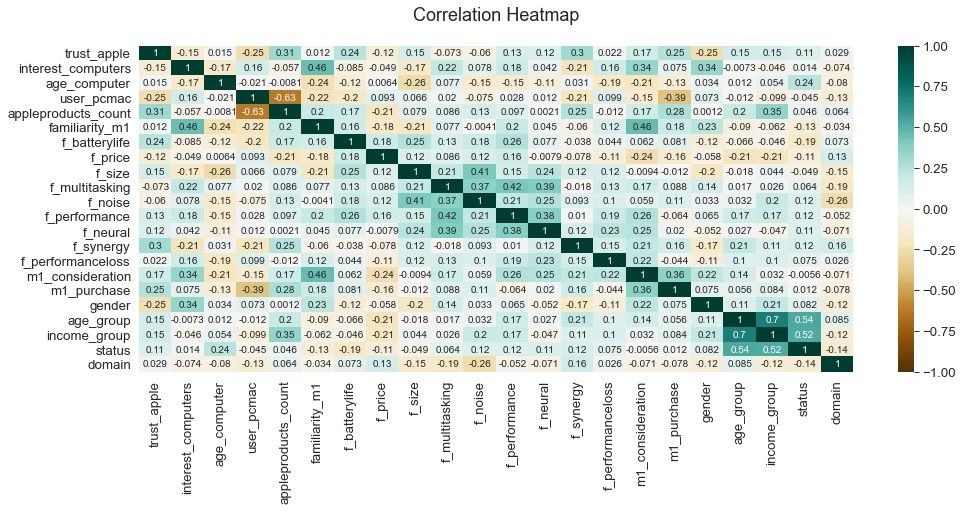

In [15]:
# VISUALIZING CORRELATION MATRIX (HEATMAP 1)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(apple_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=25);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<AxesSubplot:>

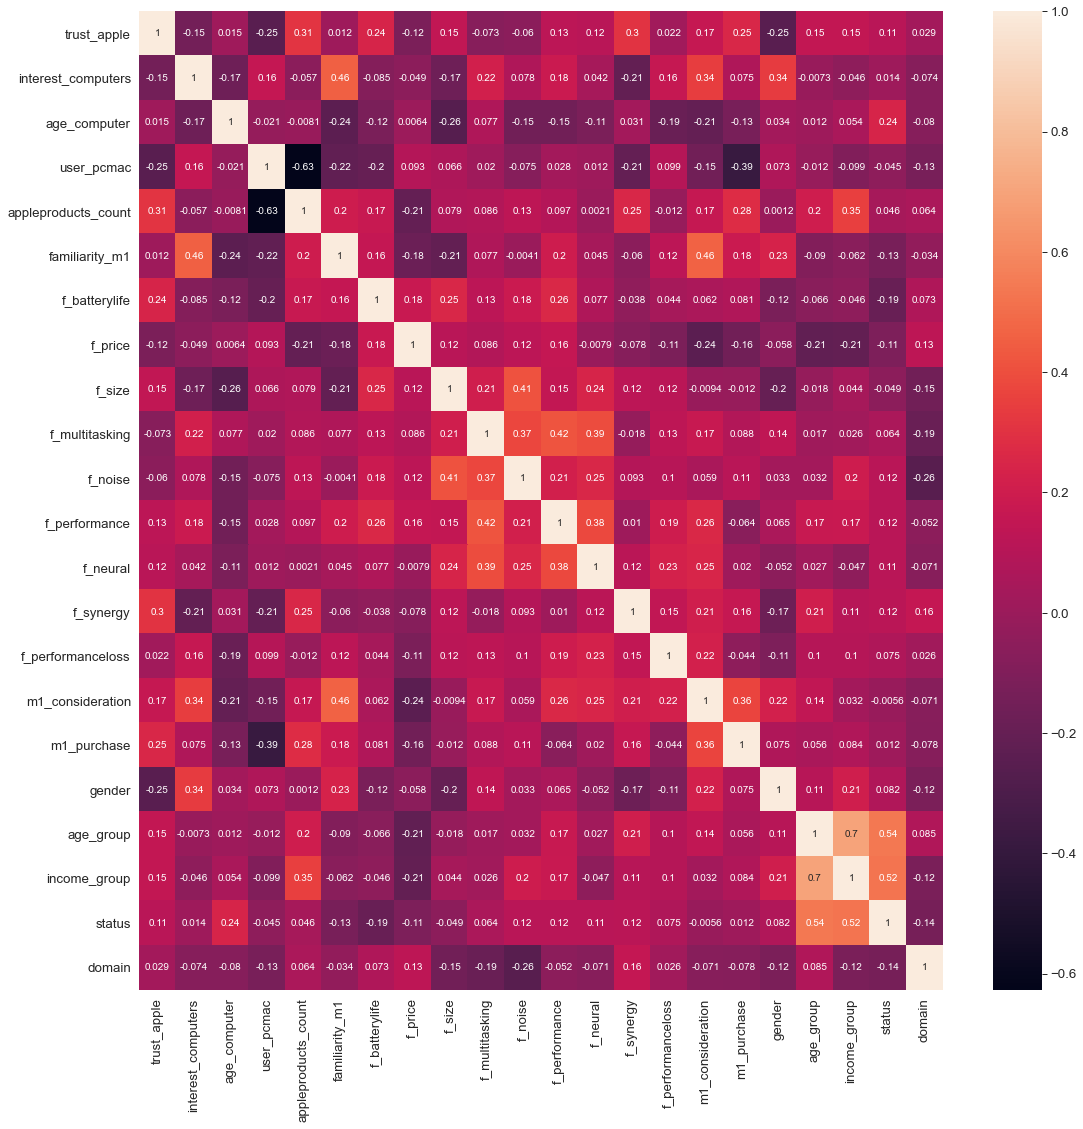

In [16]:
# FIRST LOOK AT CORRELATION MATRIX (HEATMAP 2)

correlation = apple_df.corr()
plt.figure(1,figsize = (18,18))
sns.heatmap(correlation,annot=True)

<AxesSubplot:>

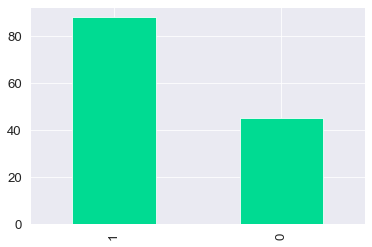

In [17]:
# VISUALIZING DEPENDENT VARIABLE

count_Class= pd.value_counts(apple_df["m1_purchase"], sort= True)
count_Class.plot(kind= 'bar')

<AxesSubplot:>

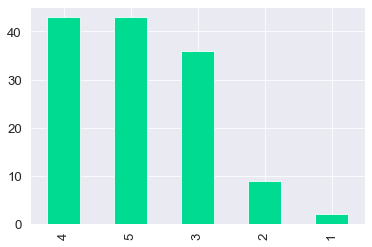

In [18]:
# VISUALIZING PRICE

count_Class= pd.value_counts(apple_df["f_price"], sort= True)
count_Class.plot(kind= 'bar')

<AxesSubplot:>

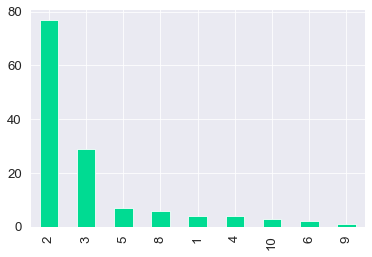

In [19]:
# VISUALIZING AGE GROUP

count_Class= pd.value_counts(apple_df["age_group"], sort= True)
count_Class.plot(kind= 'bar')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_group', ylabel='Density'>

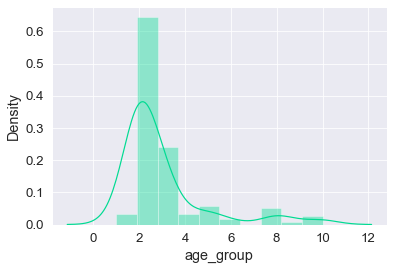

In [20]:
# VISUALIZING AGE GROUP

sns.distplot(apple_df['age_group'] , bins = 10)

<AxesSubplot:>

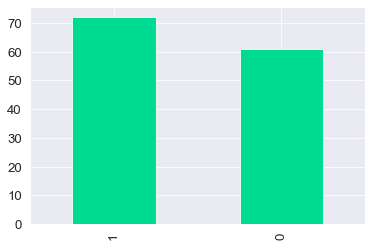

In [21]:
# VISUALIZING GENDER 

count_Class= pd.value_counts(apple_df["gender"], sort= True)
count_Class.plot(kind= 'bar')

<AxesSubplot:>

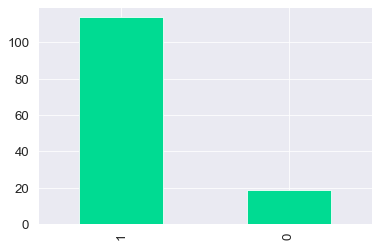

In [22]:
# VISUALIZING PRODUCT TRUST

count_Class= pd.value_counts(apple_df["trust_apple"], sort= True)
count_Class.plot(kind= 'bar')

In [23]:
# view column names again

apple_df.columns

Index(['trust_apple', 'interest_computers', 'age_computer', 'user_pcmac',
       'appleproducts_count', 'familiarity_m1', 'f_batterylife', 'f_price',
       'f_size', 'f_multitasking', 'f_noise', 'f_performance', 'f_neural',
       'f_synergy', 'f_performanceloss', 'm1_consideration', 'm1_purchase',
       'gender', 'age_group', 'income_group', 'status', 'domain'],
      dtype='object')

In [24]:
# check distribution of target_class column

df['m1_purchase'].value_counts()

1    88
0    45
Name: m1_purchase, dtype: int64

In [25]:
# view the percentage distribution of target_class column

df['m1_purchase'].value_counts()/np.float(len(df))

1    0.661654
0    0.338346
Name: m1_purchase, dtype: float64

In [26]:
apple_df.columns

Index(['trust_apple', 'interest_computers', 'age_computer', 'user_pcmac',
       'appleproducts_count', 'familiarity_m1', 'f_batterylife', 'f_price',
       'f_size', 'f_multitasking', 'f_noise', 'f_performance', 'f_neural',
       'f_synergy', 'f_performanceloss', 'm1_consideration', 'm1_purchase',
       'gender', 'age_group', 'income_group', 'status', 'domain'],
      dtype='object')

In [27]:
# Purchase correlation

apple_df.sort_values(by=["m1_purchase"],ascending=False).iloc[0].sort_values(ascending=False)

age_computer           8
f_batterylife          5
f_multitasking         4
interest_computers     4
f_noise                4
f_price                4
f_size                 3
age_group              2
f_neural               2
f_performance          2
income_group           2
user_pcmac             1
f_synergy              1
f_performanceloss      1
m1_consideration       1
m1_purchase            1
gender                 1
status                 0
trust_apple            0
familiarity_m1         0
appleproducts_count    0
domain                 0
Name: 0, dtype: int64

Text(0, 0.5, 'm1_purchase')

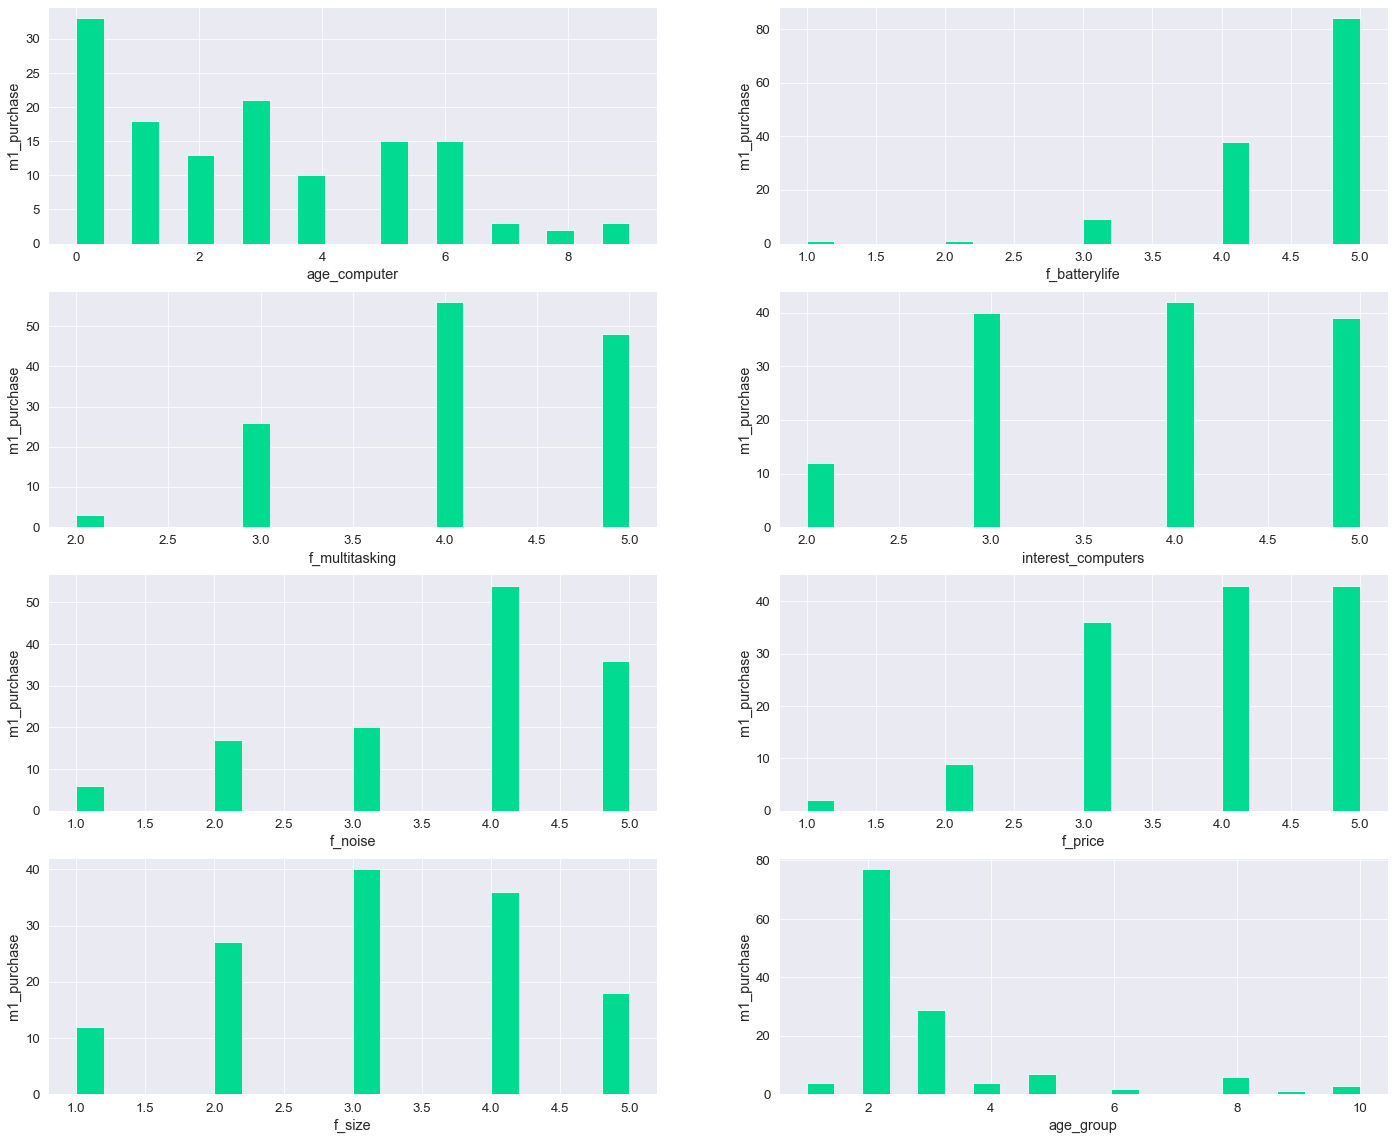

In [28]:
# plot histogram for top 8 correlated features to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = apple_df['age_computer'].hist(bins=20)
fig.set_xlabel('age_computer')
fig.set_ylabel('m1_purchase')


plt.subplot(4, 2, 2)
fig = df['f_batterylife'].hist(bins=20)
fig.set_xlabel('f_batterylife')
fig.set_ylabel('m1_purchase')


plt.subplot(4, 2, 3)
fig = df['f_multitasking'].hist(bins=20)
fig.set_xlabel('f_multitasking')
fig.set_ylabel('m1_purchase')



plt.subplot(4, 2, 4)
fig = df['interest_computers'].hist(bins=20)
fig.set_xlabel('interest_computers')
fig.set_ylabel('m1_purchase')



plt.subplot(4, 2, 5)
fig = df['f_noise'].hist(bins=20)
fig.set_xlabel('f_noise')
fig.set_ylabel('m1_purchase')



plt.subplot(4, 2, 6)
fig = df['f_price'].hist(bins=20)
fig.set_xlabel('f_price')
fig.set_ylabel('m1_purchase')



plt.subplot(4, 2, 7)
fig = df['f_size'].hist(bins=20)
fig.set_xlabel('f_size')
fig.set_ylabel('m1_purchase')


plt.subplot(4, 2, 8)
fig = df['age_group'].hist(bins=20)
fig.set_xlabel('age_group')
fig.set_ylabel('m1_purchase')





Text(0, 0.5, 'm1_purchase')

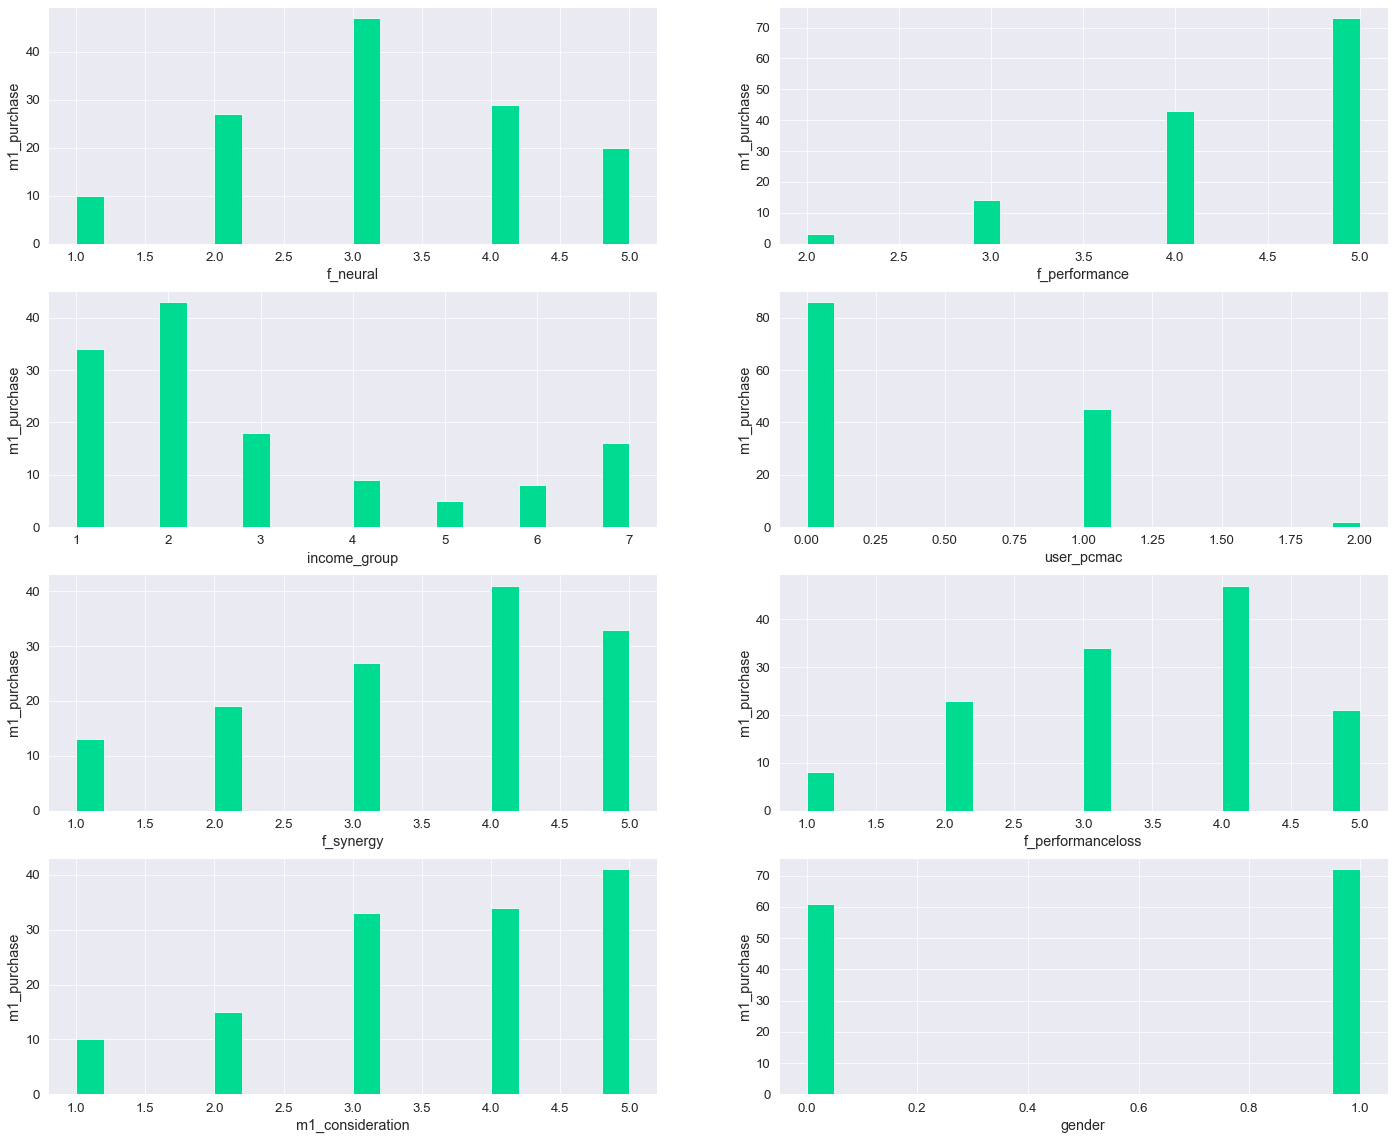

In [29]:
# plot histogram for other correlated features to check distribution

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['f_neural'].hist(bins=20)
fig.set_xlabel('f_neural')
fig.set_ylabel('m1_purchase')

plt.subplot(4, 2, 2)
fig = df['f_performance'].hist(bins=20)
fig.set_xlabel('f_performance')
fig.set_ylabel('m1_purchase')

plt.subplot(4, 2, 3)
fig = df['income_group'].hist(bins=20)
fig.set_xlabel('income_group')
fig.set_ylabel('m1_purchase')


plt.subplot(4, 2, 4)
fig = df['user_pcmac'].hist(bins=20)
fig.set_xlabel('user_pcmac')
fig.set_ylabel('m1_purchase')

plt.subplot(4, 2, 5)
fig = df['f_synergy'].hist(bins=20)
fig.set_xlabel('f_synergy')
fig.set_ylabel('m1_purchase')


plt.subplot(4, 2, 6)
fig = df['f_performanceloss'].hist(bins=20)
fig.set_xlabel('f_performanceloss')
fig.set_ylabel('m1_purchase')

plt.subplot(4, 2, 7)
fig = df['m1_consideration'].hist(bins=20)
fig.set_xlabel('m1_consideration')
fig.set_ylabel('m1_purchase')

plt.subplot(4, 2, 8)
fig = df['gender'].hist(bins=20)
fig.set_xlabel('gender')
fig.set_ylabel('m1_purchase')



In [30]:
# Selecting feature vector and target variable

X = apple_df.drop(['m1_purchase'], axis=1)
y = apple_df['m1_purchase']


## Split data into separate training and test set 

In [31]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# check the shape of X_train and X_test

X_train.shape, X_test.shape

((106, 21), (27, 21))

## Feature Scaling

In [32]:
# SELECTING ALL COLUMNS

cols = X_train.columns

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [34]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [35]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [36]:
X_train.describe()

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_performance,f_neural,f_synergy,f_performanceloss,m1_consideration,gender,age_group,income_group,status,domain
count,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,...,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02
mean,-2.513713e-17,-2.513713e-16,5.341639e-17,6.284281e-17,-8.640887e-18,1.675808e-17,1.487280e-16,1.780546e-16,1.131171e-16,2.681293e-16,...,4.252364e-16,2.367079e-16,-1.214961e-16,-1.298751e-16,-7.960090e-17,5.865329e-17,1.256856e-16,1.466332e-16,4.398997e-17,2.932665e-17
std,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,...,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00
min,-2.463060e+00,-1.778107e+00,-1.236227e+00,-6.592317e-01,-1.488774e+00,-8.588975e-01,-4.924464e+00,-3.028102e+00,-1.872364e+00,-2.536943e+00,...,-3.074494e+00,-1.900714e+00,-2.014458e+00,-2.034260e+00,-1.978694e+00,-1.058301e+00,-1.047152e+00,-9.720875e-01,-5.991447e-01,-1.329363e+00
25%,4.059990e-01,-7.592995e-01,-8.175690e-01,-6.592317e-01,-9.271726e-01,-8.588975e-01,-7.373529e-01,-9.505693e-01,-1.013184e+00,-1.303383e+00,...,-4.673230e-01,-9.972356e-01,-4.089501e-01,-2.521810e-01,-4.016897e-01,-1.058301e+00,-4.976566e-01,-9.720875e-01,-5.991447e-01,-9.510748e-01
50%,4.059990e-01,2.595074e-01,1.974804e-02,-6.592317e-01,1.960308e-01,-8.588975e-01,6.583508e-01,8.819715e-02,-1.540040e-01,-6.982411e-02,...,8.362622e-01,-9.375719e-02,3.938038e-01,-2.521810e-01,3.868123e-01,9.449112e-01,-4.976566e-01,-4.718871e-01,-5.991447e-01,-5.353141e-03
75%,4.059990e-01,1.278314e+00,8.570650e-01,1.396020e+00,6.172321e-01,1.164283e+00,6.583508e-01,1.126964e+00,7.051762e-01,1.163735e+00,...,8.362622e-01,8.097212e-01,3.938038e-01,6.388585e-01,1.175314e+00,9.449112e-01,5.183922e-02,5.285136e-01,5.349506e-01,5.620799e-01
max,4.059990e-01,1.278314e+00,2.531699e+00,3.451272e+00,2.442438e+00,1.164283e+00,6.583508e-01,1.126964e+00,1.564356e+00,1.163735e+00,...,8.362622e-01,1.713200e+00,1.196558e+00,1.529898e+00,1.175314e+00,9.449112e-01,3.898310e+00,2.029115e+00,3.937237e+00,4.155822e+00


## SVM with default hyperparameters

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.



In [37]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7037


##  SVM with linear kernel 

In [38]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.7037


In [39]:
# Compare the train-set and test-set accuracy¶

y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Check for overfitting and underfitting ( Accuracy)

In [40]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.8208
Test set score: 0.7037


## SVM with polynomial kernel 

In [41]:
# instantiate classifier with polynomial kernel and C=1.0

poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7037


In [42]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.6667


## SVM with sigmoid kernel 

In [43]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8148


In [44]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8519


#### From the above models,we can see that sigmoid kernel performance is by far the best in terms of model accuracy when 

- When C = 1 an accuracy of 81 % is achieved 
- when C = 100 an accuract of 85 % is achieved



## Confusion matrix

In [45]:
# Printing the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 5  4]
 [ 4 14]]

True Positives(TP) =  5

True Negatives(TN) =  14

False Positives(FP) =  4

False Negatives(FN) =  4


The confusion matrix shows 5 + 14 = 19 correct predictions and 4 + 4 = 8 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 5
- True Negatives (Actual Negative:0 and Predict Negative:0) - 14
- False Positives (Actual Negative:0 but Predict Positive:1) - 4 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 4 (Type II error)





<AxesSubplot:>

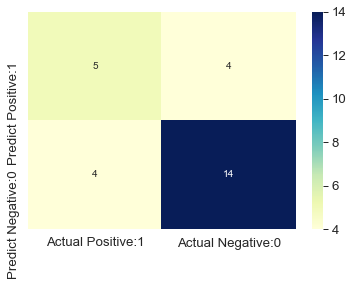

In [46]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices


#### Classification Report

- Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.78      0.78      0.78        18

    accuracy                           0.70        27
   macro avg       0.67      0.67      0.67        27
weighted avg       0.70      0.70      0.70        27



In [48]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [49]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7037


In [50]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2963


## Feature Importance 

In [51]:
#running feature importance with DecisionTreeClassifier
#entropy is used to measure disorder in the columns
#max_depth defines the maximum depth of the tree/max features

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [52]:
#creating empty lists to append the values 
col = []
fi = []

#the parameter axis=1 refer to columns, while 0 refers to rows
for i, column in enumerate(df.drop('m1_purchase', axis = 1)):
  col.append(column)
  fi.append(dt.feature_importances_[i])

#displaying fi_df as a new dataframe displaying the feature importances 
fi_df = zip(col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['feature', 'feature_importance'])

#sorting the feature importance in ascending order
fi_df = fi_df.sort_values('feature_importance', ascending = False).reset_index()

#the last 5 columns have no relation to y at all
fi_df

,index,feature,feature_importance
0,3,user_pcmac,0.151340
1,14,f_performanceloss,0.121983
2,15,m1_consideration,0.118166
3,20,domain,0.089777
4,13,f_synergy,0.088404
5,2,age_computer,0.082403
6,18,income_group,0.078410
7,11,f_performance,0.044592
8,0,trust_apple,0.036014
9,17,age_group,0.032832


In [97]:
#keep our 10 most important features (x)
imp_col = fi_df['feature'][0:10]

#original dataframe 
print(apple_df.shape)

#new dataframe with only the features we want (x)
print(apple_df[imp_col].shape)

(133, 22)
(133, 10)


In [98]:
#displaying 10 'most important' features that we decided to use
imp_col

0           user_pcmac
1    f_performanceloss
2     m1_consideration
3               domain
4            f_synergy
5         age_computer
6         income_group
7        f_performance
8          trust_apple
9            age_group
Name: feature, dtype: object

In [99]:
#displaying the 10 most important features with data
m1_df = df[imp_col]

In [100]:
X = m1_df.values
X.astype(int)

y = np.array(apple_df['m1_purchase']).reshape(-1,1)
y = y.astype(int)

print(X.shape)
print(y.shape)

(133, 10)
(133, 1)


In [101]:
#creating a training and test set 
#the train and test size is set to the same size as it gave the best accuracy score
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.20, test_size = 0.20,random_state=25)

#scaling and normalizing the data (this also imporved the score)
sc = StandardScaler() 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [103]:
#checking the shape of the train and test set
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(26, 1)
(26, 10)
(27, 1)
(27, 10)


In [104]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8519


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
print(f'\nPredicted m1 purchases: {y_pred}')
print(f'Real m1 purchases: {y_test.ravel()}')


Predicted m1 purchases: [1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
Real m1 purchases: [1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1]


In [106]:
#confusion materix 
confmtrx = np.array(confusion_matrix(y_test, y_pred))


cm = pd.DataFrame(confmtrx, index=['Actual Not Buyers', 'Actual Buyers'],
columns=['Predicted Not Buyers', 'Predicted Buyers'])
cm

,Predicted Not Buyers,Predicted Buyers
Actual Not Buyers,3,3
Actual Buyers,1,20


In [107]:
#calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = confmtrx.sum(axis=0) - np.diag(confmtrx)
FN = confmtrx.sum(axis=1) - np.diag(confmtrx)
TP = np.diag(confmtrx)
TN = confmtrx.sum() - (FP + FN + TP)

#true positive rate (sensitivity)
TPR = TP / (TP + FN)

#true negative (precision)
TNR = TP / (TP + FP)

#false positive rate or False alarm rate
FPR = FP / (FP + TN)

#false negative rate or Miss Rate
FNR = FN / (FN + TP)

#the averages
print(f'The average True Positive Rate is: {round((TPR.sum()/2)*100, 2)} %')
print(f'The average True Negative Rate is: {round((TNR.sum()/2)*100, 2)} %')
print(f'The average False Positive Rate is: {round((FPR.sum()/2)*100, 2)} %')
print(f'The average False Negative Rate is: {round((FNR.sum()/2)*100, 2)} %')


The average True Positive Rate is: 72.62 %
The average True Negative Rate is: 80.98 %
The average False Positive Rate is: 27.38 %
The average False Negative Rate is: 27.38 %


In the small training and testing sets used, the algorithm classified the data instance wrong 4/27 and correct 23/27 times as shown in the confusion matrix. To further increase the accuracy of this model, hyper parameter tuning would need to be applied. It is also worth noting that even with optimal parameters the model might not perform better due to the data being insufficient.